In [1]:
import pandas as pd
import numpy as np


In [2]:
runs = pd.read_csv('runs.csv')

/tmp/ipykernel_37146/2396321447.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  runs = pd.read_csv('runs.csv')


In [3]:
#create a column with the dataset name
runs['Dataset'] = runs['tags.mlflow.runName'].str.split(':', expand=True)[1]

In [4]:
pd.pivot_table(data=runs.fillna(0), values=['metrics.accuracy', 'metrics.f1', 'metrics.area_under_the_curve' ], index=['estimator_name'],aggfunc=np.average)

,metrics.accuracy,metrics.area_under_the_curve,metrics.f1
estimator_name,,,
K_NeighboursClassifier,0.444994,0.449747,0.309160
LogisticRegression,0.414341,0.430451,0.327410
RF_CUSUM_exogenous,0.508682,0.507195,0.460019
RF_HMM_exogenous,0.500453,0.500917,0.464285
RandomForestClassifier,0.446918,0.431603,0.318736
SVMClassifier,0.439953,0.451747,0.209756
k_neighbours_regressor,0.506118,0.517260,0.385048
lasso_regressor,0.545871,0.525190,0.534841
random_forest_regressor,0.516218,0.520068,0.453327


In [5]:
runs.tail()

,Unnamed: 0,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.area_under_the_curve,metrics.f1,metrics.accuracy,params.run_error,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.git.commit,tags.mlflow.runName,estimator_name,Dataset
99995,99995,d165f219d1d84779803625e41223da1f,0,FINISHED,./artifacts/0/d165f219d1d84779803625e41223da1f...,2022-12-13 22:24:18.200000+00:00,2022-12-13 22:24:18.245000+00:00,0.507576,0.285714,0.411765,NaN,orchestration.py,viktor,LOCAL,93cab69a4f6be87e9518891d147dd46d2190428d,svm_regressor-dataset:M38001,svm_regressor,M38001
99996,99996,7f9b29c3ce31486d8bf5fb6bc54a0366,0,FINISHED,./artifacts/0/7f9b29c3ce31486d8bf5fb6bc54a0366...,2022-12-13 22:24:18.123000+00:00,2022-12-13 22:24:18.174000+00:00,0.386364,0.352941,0.352941,NaN,orchestration.py,viktor,LOCAL,93cab69a4f6be87e9518891d147dd46d2190428d,random_forest_regressor-dataset:M38001,random_forest_regressor,M38001
99997,99997,5f8cfab4fdd74269b926fcdf09c45515,0,FINISHED,./artifacts/0/5f8cfab4fdd74269b926fcdf09c45515...,2022-12-13 22:24:17.855000+00:00,2022-12-13 22:24:17.902000+00:00,0.530303,0.695652,0.588235,NaN,orchestration.py,viktor,LOCAL,93cab69a4f6be87e9518891d147dd46d2190428d,lasso_regressor-dataset:M38001,lasso_regressor,M38001
99998,99998,7d57e823e3a64fb8a4bfeb3cb6ade9bb,0,FINISHED,./artifacts/0/7d57e823e3a64fb8a4bfeb3cb6ade9bb...,2022-12-13 22:24:17.788000+00:00,2022-12-13 22:24:17.831000+00:00,0.333333,0.000000,0.235294,NaN,orchestration.py,viktor,LOCAL,93cab69a4f6be87e9518891d147dd46d2190428d,RF_HMM_exogenous-dataset:M38001,RF_HMM_exogenous,M38001
99999,99999,939041d519614a1db20c2a47a342f7cf,0,FINISHED,./artifacts/0/939041d519614a1db20c2a47a342f7cf...,2022-12-13 22:24:17.270000+00:00,2022-12-13 22:24:17.319000+00:00,0.257576,0.235294,0.235294,NaN,orchestration.py,viktor,LOCAL,93cab69a4f6be87e9518891d147dd46d2190428d,RF_CUSUM_exogenous-dataset:M38001,RF_CUSUM_exogenous,M38001


In [6]:
#calculate standard error
columns = ['ESTIMATOR_NAME', 'METRIC', 'MEAN','ST_ERR']
point_estimates_and_st_errors = pd.DataFrame(columns=columns)
metrics = ['metrics.area_under_the_curve', 'metrics.f1', 'metrics.accuracy']
for est in runs['estimator_name'].unique():
    for metric in metrics:
        all_values = runs[runs['estimator_name'] == est][metric]
        average = np.nanmean(all_values)
        std = np.std(all_values)
        num = len(all_values)
        std_err = std/np.sqrt(num)
        row_data = pd.DataFrame([{columns[0]: est, columns[1]: metric, columns[2]: average,columns[3]:std_err }])
        point_estimates_and_st_errors = pd.concat([point_estimates_and_st_errors, row_data])
        

In [7]:
point_estimates_and_st_errors.pivot(index='ESTIMATOR_NAME', columns='METRIC')

MEAN                               \
METRIC                  metrics.accuracy metrics.area_under_the_curve   
ESTIMATOR_NAME                                                          
K_NeighboursClassifier          0.444994                     0.456318   
LogisticRegression              0.414673                     0.436873   
RF_CUSUM_exogenous              0.508682                     0.514605   
RF_HMM_exogenous                0.507404                     0.515400   
RandomForestClassifier          0.446918                     0.437909   
SVMClassifier                   0.440305                     0.458486   
k_neighbours_regressor          0.506118                     0.524817   
lasso_regressor                 0.545871                     0.532863   
random_forest_regressor         0.516218                     0.527666   
svm_regressor                   0.495924                     0.514489   

                                             ST_ERR  \
METRIC                  metrics.f1 metrics.accuracy   
ESTIMATOR_NAME                                        
K_NeighboursClassifier    0.309160         0.001619   
LogisticRegression        0.327672         0.001554   
RF_CUSUM_exogenous        0.460019         0.001409   
RF_HMM_exogenous          0.470734         0.001358   
RandomForestClassifier    0.318736         0.001676   
SVMClassifier             0.209924         0.001655   
k_neighbours_regressor    0.385048         0.001675   
lasso_regressor           0.534841         0.001630   
random_forest_regressor   0.453327         0.001549   
svm_regressor             0.374319         0.001525   

                                                                 
METRIC                  metrics.area_under_the_curve metrics.f1  
ESTIMATOR_NAME                                                   
K_NeighboursClassifier                      0.001100   0.002519  
LogisticRegression                          0.001324   0.001951  
RF_CUSUM_exogenous                          0.001355   0.001900  
RF_HMM_exogenous                            0.001340   0.001815  
RandomForestClassifier                      0.001108   0.002669  
SVMClassifier                               0.000937   0.002591  
k_neighbours_regressor                      0.001298   0.002544  
lasso_regressor                             0.001383   0.002174  
random_forest_regressor                     0.001372   0.002077  
svm_regressor                               0.001070   0.002612

In [8]:
# results by dataset
accuracy_by_dts = pd.pivot_table(data = runs, index='Dataset', values='metrics.accuracy', columns='estimator_name')
f1_by_dts = pd.pivot_table(data = runs, index='Dataset', values='metrics.f1', columns='estimator_name')
auc_by_dts = pd.pivot_table(data = runs, index='Dataset', values='metrics.area_under_the_curve', columns='estimator_name')


In [9]:
from scipy import stats
print(stats.friedmanchisquare(*accuracy_by_dts.values))
print(stats.friedmanchisquare(*f1_by_dts.values))
print(stats.friedmanchisquare(*auc_by_dts.values))


FriedmanchisquareResult(statistic=nan, pvalue=nan)
FriedmanchisquareResult(statistic=nan, pvalue=nan)
FriedmanchisquareResult(statistic=nan, pvalue=nan)


In [10]:
import scikit_posthocs as sp

nemenyi_acc = sp.posthoc_nemenyi_friedman(accuracy_by_dts.values)


In [11]:
nemenyi_acc.columns = accuracy_by_dts.columns
nemenyi_acc.index  = accuracy_by_dts.columns

In [12]:
nemenyi_acc

estimator_name,K_NeighboursClassifier,LogisticRegression,RF_CUSUM_exogenous,RF_HMM_exogenous,RandomForestClassifier,SVMClassifier,k_neighbours_regressor,lasso_regressor,random_forest_regressor,svm_regressor
estimator_name,,,,,,,,,,
K_NeighboursClassifier,1.000000,0.001,0.001000,0.001000,0.455625,0.818083,0.001000,0.001,0.001000,0.001000
LogisticRegression,0.001000,1.000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001,0.001000,0.001000
RF_CUSUM_exogenous,0.001000,0.001,1.000000,0.900000,0.001000,0.001000,0.138991,0.001,0.024319,0.001000
RF_HMM_exogenous,0.001000,0.001,0.900000,1.000000,0.001000,0.001000,0.093565,0.001,0.039853,0.001000
RandomForestClassifier,0.455625,0.001,0.001000,0.001000,1.000000,0.900000,0.001000,0.001,0.001000,0.001000
SVMClassifier,0.818083,0.001,0.001000,0.001000,0.900000,1.000000,0.001000,0.001,0.001000,0.001000
k_neighbours_regressor,0.001000,0.001,0.138991,0.093565,0.001000,0.001000,1.000000,0.001,0.001000,0.832417
lasso_regressor,0.001000,0.001,0.001000,0.001000,0.001000,0.001000,0.001000,1.000,0.001000,0.001000
random_forest_regressor,0.001000,0.001,0.024319,0.039853,0.001000,0.001000,0.001000,0.001,1.000000,0.001000


In [24]:
avg_rank = accuracy_by_dts.T.rank(ascending=False).mean(axis=1)

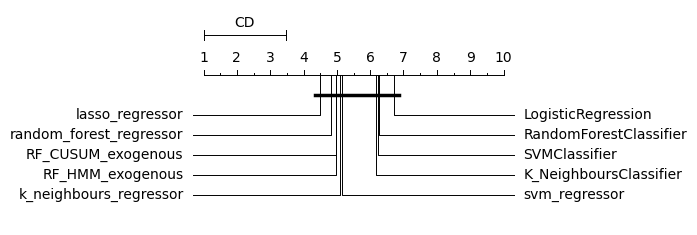

In [25]:
import Orange
import matplotlib.pyplot as plt
names = avg_rank.index
avranks =  avg_rank.values
cd = Orange.evaluation.compute_CD(avranks, 30) #tested on 30 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
plt.show()